In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

sys.path.append("..")

from cybb_mist.path_conf import interim_data_dir, processed_data_dir
from tqdm.auto import tqdm
import pandas as pd
from functional import seq
from cybb_mist.trigger_mapping import parse_trigger_series


## constructing `df_trigger_tot`

In [1]:
pqt_list = []
for pqt in tqdm(list(interim_data_dir.rglob("*/SCL_*.parquet"))):
    try:
        df_trigger = parse_trigger_series(pd.read_parquet(pqt)["trigger"])
        df_trigger["patient_id"] = pqt.parent.name
        df_trigger["condition"] = pqt.name.split(".")[0].split("_")[-1]
        pqt_list.append(df_trigger)
    except Exception as e:
        print(e)
df_trigger_tot = pd.concat(pqt_list)
del pqt_list, df_trigger, pqt


NameError: name 'tqdm' is not defined

## Analyzing `df_trigger_tot`

### Duration analysis

In [43]:
df_trigger_tot["duration"] = df_trigger_tot["t_end"] - df_trigger_tot["t_start"]
df_trigger_tot["duration_s"] = df_trigger_tot["duration"].dt.total_seconds()
df_trigger_tot['trigger_str'] = df_trigger_tot.trigger.str[6:]

In [44]:
import seaborn as sns

sns.set_context("talk")


/users/jonvdrdo/.cache/pypoetry/virtualenvs/cyberball-mist-analysis-yH9Bfvkg-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


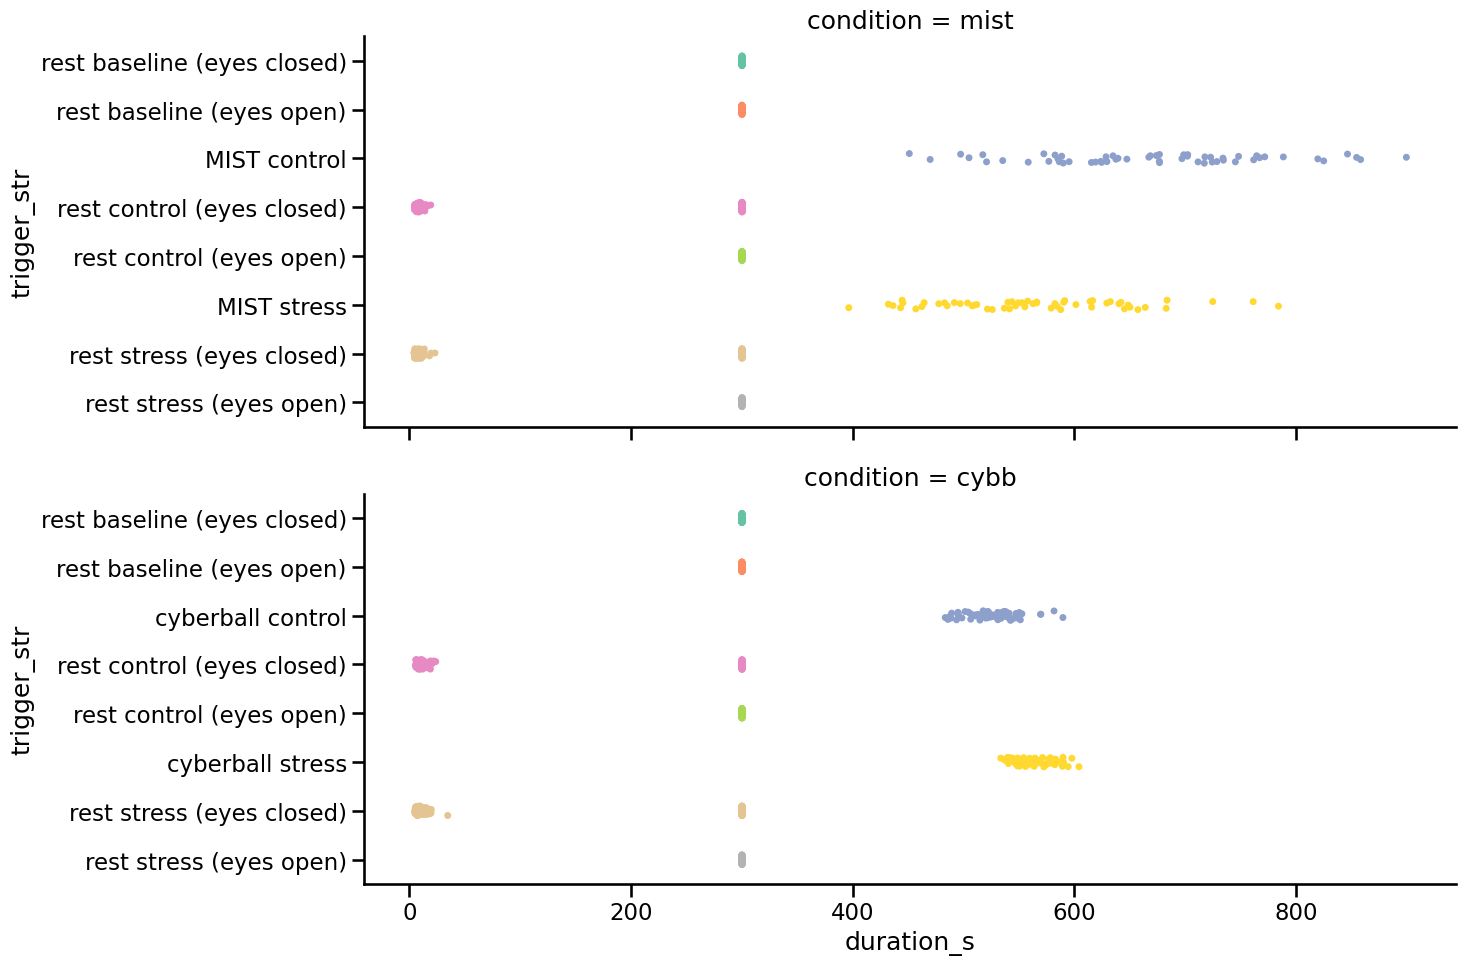

In [46]:
sns.catplot(
    data=df_trigger_tot[df_trigger_tot.condition.isin(["mist", "cybb"])].dropna(),
    y="trigger_str",
    x="duration_s",
    aspect=3,
    row="condition",
    palette="Set2",
    sharey=False,
)
